# Exploratory Data Analysis - Wine Reviews

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go


from scipy.stats import kurtosis, skew  # explore statistics of numerical values
from scipy import stats

**INPUT DATA**

In [2]:
import os
os.getcwd()
os.chdir("D:\DATA ANALYTICS\CODELEVITA")

**EXPLORING THE DATA**

In [3]:
wine = pd.read_csv('wine-reviews.csv')
wine.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [4]:
wine.shape

(129971, 14)

In [5]:
def table(wine):
    data = pd.DataFrame(wine.dtypes,columns=['dtypes'])
    data = data.reset_index()
    data['name'] = data['index']
    data = data[['name','dtypes']]
    data['Missing'] = wine.isnull().sum().values
    data['Uniques'] = wine.nunique().values
    data['First Value'] = wine.loc[0].values
    data['Second Value'] = wine.loc[1].values
    data['Third Value'] = wine.loc[2].values
    
    for name in data['name'].value_counts().index:
        data.loc[data['name']==name,'Entropy']=round(stats.entropy(wine[name].value_counts(normalize=True),base=2),2)
        return data
    

In [6]:
table(wine)

name   dtypes  Missing  Uniques  \
0              Unnamed: 0    int64        0   129971   
1                 country   object       63       43   
2             description   object        0   119955   
3             designation   object    37465    37976   
4                  points    int64        0       21   
5                   price  float64     8996      390   
6                province   object       63      425   
7                region_1   object    21247     1229   
8                region_2   object    79460       17   
9             taster_name   object    26244       19   
10  taster_twitter_handle   object    31213       15   
11                  title   object        0   118840   
12                variety   object        1      707   
13                 winery   object        0    16757   

                                          First Value  \
0                                                   0   
1                                               Italy   
2   Aromas include tropical fruit, broom, brimston...   
3                                        Vulkà Bianco   
4                                                  87   
5                                                 NaN   
6                                   Sicily & Sardinia   
7                                                Etna   
8                                                 NaN   
9                                       Kerin O’Keefe   
10                                       @kerinokeefe   
11                  Nicosia 2013 Vulkà Bianco  (Etna)   
12                                        White Blend   
13                                            Nicosia   

                                         Second Value  \
0                                                   1   
1                                            Portugal   
2   This is ripe and fruity, a wine that is smooth...   
3                                            Avidagos   
4                                                  87   
5                                                15.0   
6                                               Douro   
7                                                 NaN   
8                                                 NaN   
9                                          Roger Voss   
10                                         @vossroger   
11      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
12                                     Portuguese Red   
13                                Quinta dos Avidagos   

                                          Third Value  Entropy  
0                                                   2    16.99  
1                                                  US      NaN  
2   Tart and snappy, the flavors of lime flesh and...      NaN  
3                                                 NaN      NaN  
4                                                  87      NaN  
5                                                14.0      NaN  
6                                              Oregon      NaN  
7                                   Willamette Valley      NaN  
8                                   Willamette Valley      NaN  
9                                        Paul Gregutt      NaN  
10                                        @paulgwine       NaN  
11      Rainstorm 2013 Pinot Gris (Willamette Valley)      NaN  
12                                         Pinot Gris      NaN  
13                                          Rainstorm      NaN

In [7]:
print("Statistics of numerical data: ")
wine.describe()

Statistics of numerical data: 


Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

In [8]:
wine.columns.values

array(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype=object)

In [9]:
wine.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

**DATA CLEANING**

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


**Missing values in 'country', 'price', 'province', 'variety'**

In [11]:
# gets all null values

wine.isna()

Unnamed: 0  country  description  designation  points  price  \
0            False    False        False        False   False   True   
1            False    False        False        False   False  False   
2            False    False        False         True   False  False   
3            False    False        False        False   False  False   
4            False    False        False        False   False  False   
...            ...      ...          ...          ...     ...    ...   
129966       False    False        False        False   False  False   
129967       False    False        False         True   False  False   
129968       False    False        False        False   False  False   
129969       False    False        False         True   False  False   
129970       False    False        False        False   False  False   

        province  region_1  region_2  taster_name  taster_twitter_handle  \
0          False     False      True        False                  False   
1          False      True      True        False                  False   
2          False     False     False        False                  False   
3          False     False      True        False                   True   
4          False     False     False        False                  False   
...          ...       ...       ...          ...                    ...   
129966     False      True      True        False                   True   
129967     False     False     False        False                  False   
129968     False     False      True        False                  False   
129969     False     False      True        False                  False   
129970     False     False      True        False                  False   

        title  variety  winery  
0       False    False   False  
1       False    False   False  
2       False    False   False  
3       False    False   False  
4       False    False   False  
...       ...      ...     ...  
129966  False    False   False  
129967  False    False   False  
129968  False    False   False  
129969  False    False   False  
129970  False    False   False  

[129971 rows x 14 columns]

In [12]:
# proportion of price non null
print("{:.0%}".format(wine["price"].count() / wine.shape[0]))

93%


In [13]:
# drop only the rows with missing values
wine = wine.dropna(subset=["country", "price", "variety"])

In [14]:
# drop the missing columns
wine = wine.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_twitter_handle"], axis=1)
wine.head()

country                                        description  points  price  \
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   
5     Spain  Blackberry and raspberry aromas show a typical...      87   15.0   

         province         taster_name  \
1           Douro          Roger Voss   
2          Oregon        Paul Gregutt   
3        Michigan  Alexander Peartree   
4          Oregon        Paul Gregutt   
5  Northern Spain   Michael Schachner   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
5               Tandem

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   taster_name  96420 non-null   object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


In [16]:
wine.shape

(120915, 9)

In [17]:
wine.duplicated().sum()

9378

In [18]:
# check null value of each

wine.isnull().any()

country        False
description    False
points         False
price          False
province       False
taster_name     True
title          False
variety        False
winery         False
dtype: bool

In [19]:
wine.isnull().sum()

country            0
description        0
points             0
price              0
province           0
taster_name    24495
title              0
variety            0
winery             0
dtype: int64

In [20]:
wine.dropna(inplace=True)

In [21]:
#checking the missing values
wine.isnull().sum()

country        0
description    0
points         0
price          0
province       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

In [22]:
wine.shape

(96420, 9)

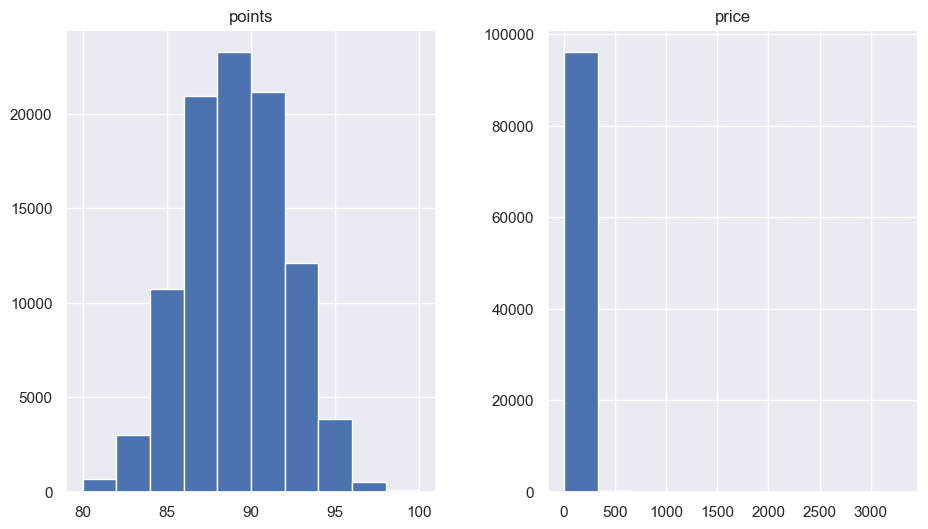

In [23]:
wine.hist(figsize=(11,6))
plt.show()

In [24]:
wine.skew(axis=0)

points     0.005683
price     18.957567
dtype: float64

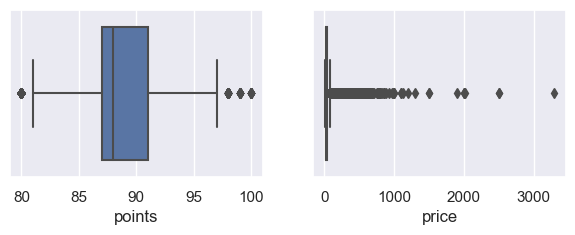

In [25]:
# to check outliers

plt.figure(figsize=(15,10))

plt.subplot(4,4,1)
sns.boxplot(wine['points']);

plt.subplot(4,4,2)
sns.boxplot(wine['price']);


In [26]:
wine_n = wine.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(wine_n.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  2


In [27]:
no_outlier =[]

def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    
     #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [28]:
outlier_list = [x for x in wine_n.columns if x not in no_outlier]

for i in wine_n[outlier_list]:    
    wine_n[i]=treat_outlier(wine_n[i])

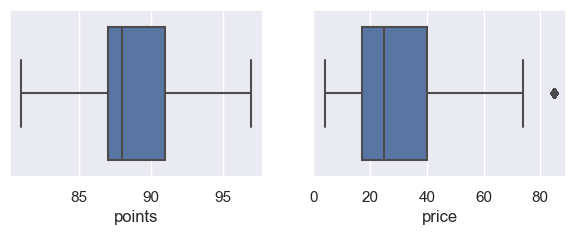

In [29]:
# removing or clipping outliers

plt.figure(figsize=(15,10))

plt.subplot(4,4,1)
sns.boxplot(wine_n['points']);

plt.subplot(4,4,2)
sns.boxplot(wine_n['price']);

In [30]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(wine_n[column].describe(),end=' ')


    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(wine_n[column], kde=True, color='y');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=wine_n[column],color='y')
    plt.show()

Description of points
----------------------------------------------------------------------------
count    96420.000000
mean        88.592232
std          2.914550
min         81.000000
25%         87.000000
50%         88.000000
75%         91.000000
max         97.000000
Name: points, dtype: float64 

Distribution of points
----------------------------------------------------------------------------


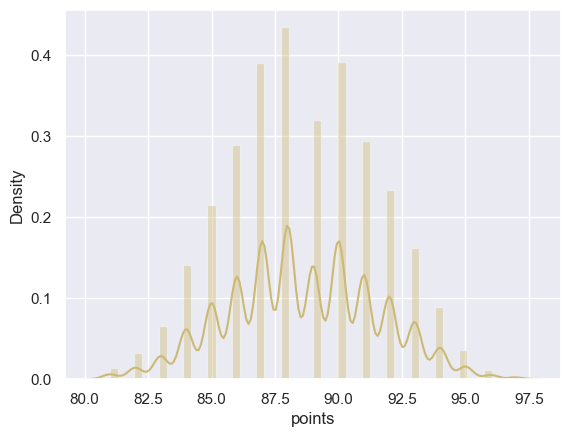

BoxPlot of points
----------------------------------------------------------------------------


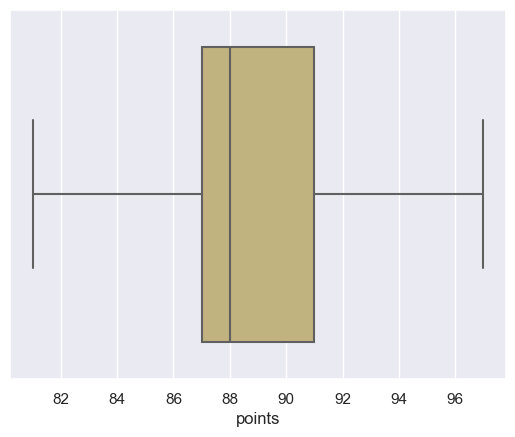

Description of price
----------------------------------------------------------------------------
count    96420.000000
mean        32.070597
std         20.747610
min          4.000000
25%         17.000000
50%         25.000000
75%         40.000000
max         85.000000
Name: price, dtype: float64 

Distribution of price
----------------------------------------------------------------------------


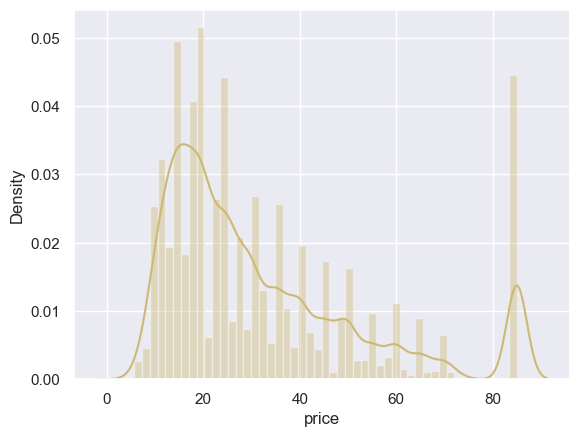

BoxPlot of price
----------------------------------------------------------------------------


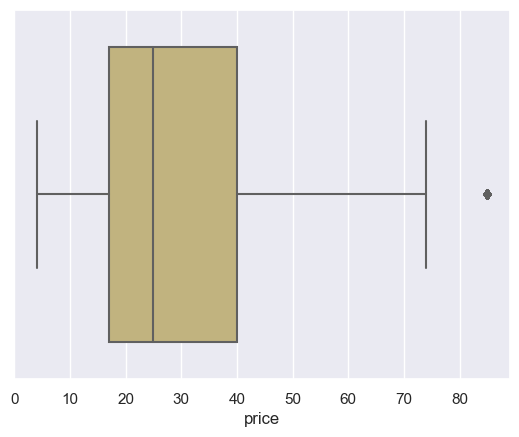

In [31]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,10)

In [32]:
for column in wine.columns:
    if wine[column].dtype == 'object':
        print(column.upper(),': ',wine[column].nunique())
        print(wine[column].value_counts().sort_values())
        print('\n')

COUNTRY :  42
China                         1
Slovakia                      1
Bosnia and Herzegovina        2
Armenia                       2
Luxembourg                    6
Switzerland                   7
India                         9
Cyprus                       11
Macedonia                    12
Czech Republic               12
Serbia                       12
Ukraine                      14
Peru                         16
Morocco                      28
Lebanon                      35
Brazil                       47
Moldova                      59
Mexico                       65
England                      69
Croatia                      71
Slovenia                     80
Georgia                      84
Turkey                       90
Uruguay                     109
Romania                     120
Bulgaria                    141
Hungary                     144
Canada                      253
Greece                      461
Israel                      484
South Africa              

In [33]:
wine_cat = wine.select_dtypes(include = ['object'])
lstcatcolumns = list(wine_cat.columns.values)
print("Categorical Columns = " ,lstcatcolumns)

Categorical Columns =  ['country', 'description', 'province', 'taster_name', 'title', 'variety', 'winery']


**DATA ANALYSIS THROUGH VISUALIZATION**

In [34]:
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = 8, 5
pd.options.plotting.backend = "plotly"

In [35]:
fig = wine.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

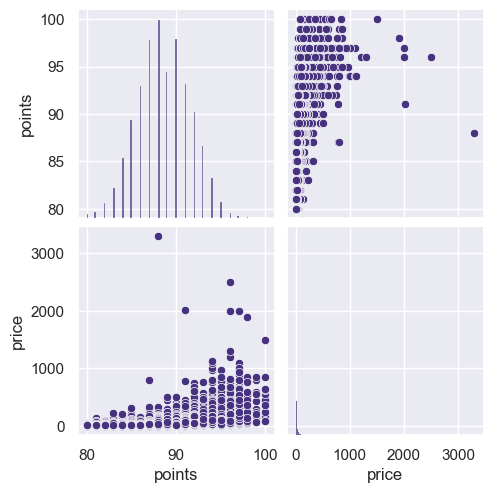

In [36]:
sns.set_palette('viridis')
sns.pairplot(wine);

In [37]:
# Top 10 wine producing countries

country_top10 = wine["country"].value_counts()[:10]
country_top10

US           37511
France       17525
Italy        10121
Spain         6509
Portugal      4870
Chile         4305
Argentina     3753
Austria       2791
Germany       2093
Australia     2007
Name: country, dtype: int64

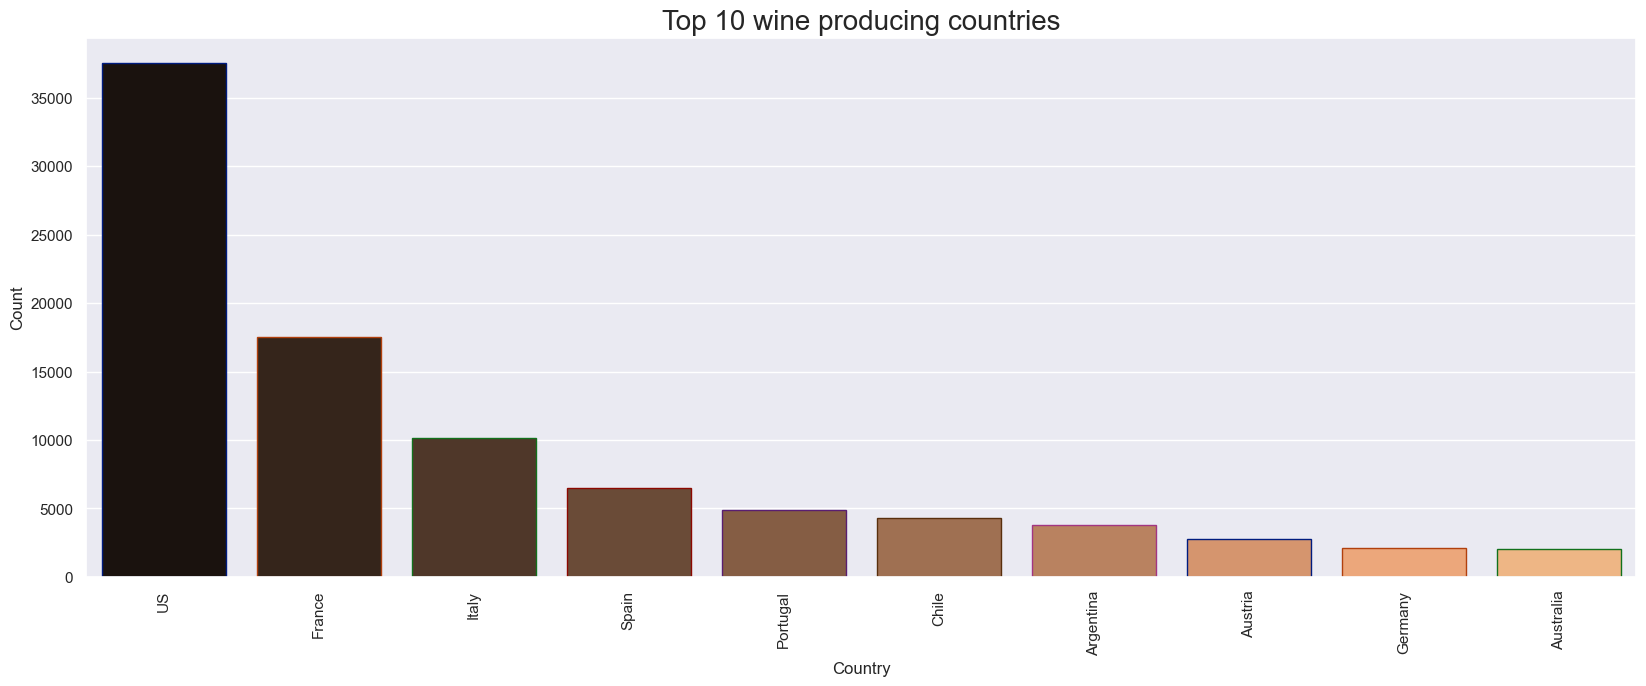

In [38]:
plt.figure(figsize=(20,7))
sns.countplot(x =wine['country'],palette='copper',edgecolor=sns.color_palette('dark',7),order=(wine['country'].value_counts().head(10)).index)
plt.xticks(rotation=90)
plt.title('Top 10 wine producing countries', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Count');

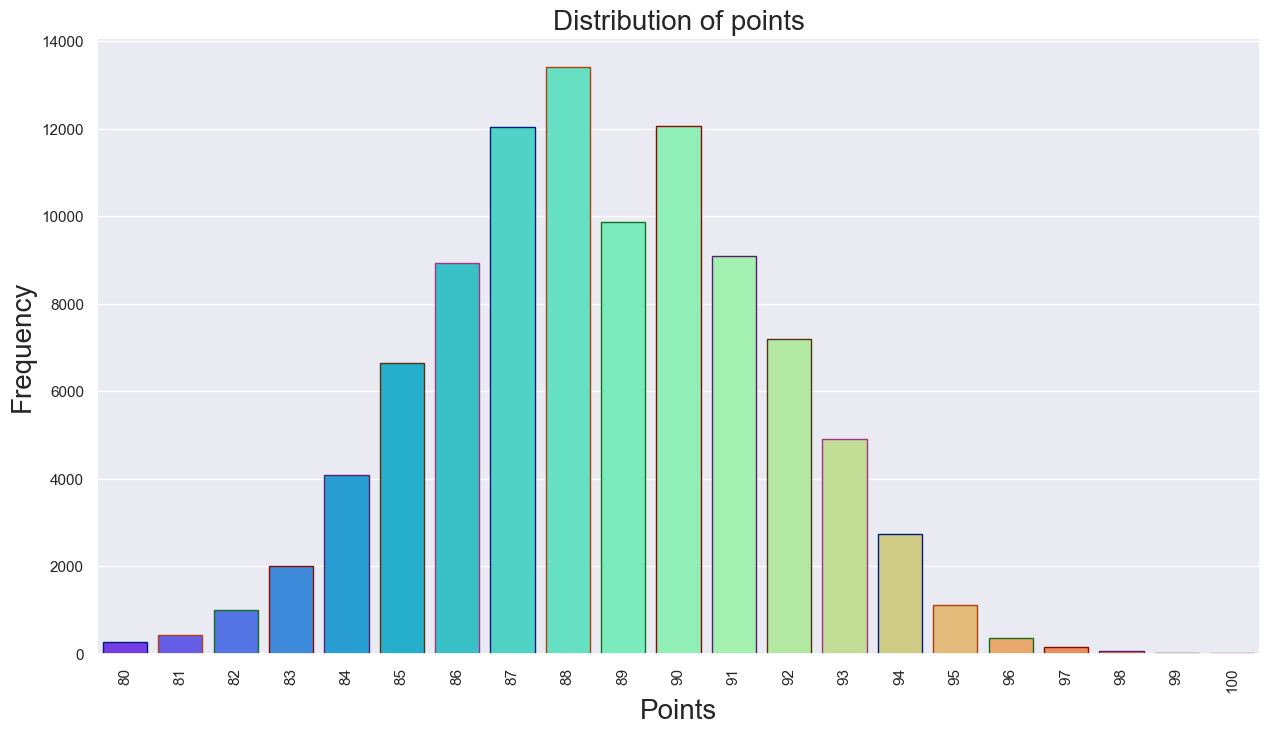

In [39]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x ='points', data =wine,palette='rainbow',edgecolor=sns.color_palette('dark',7));
plt.ylabel("Frequency",fontsize=20)
plt.xlabel('Points',fontsize=20)
plt.title('Distribution of points',fontsize=20)
plt.show()

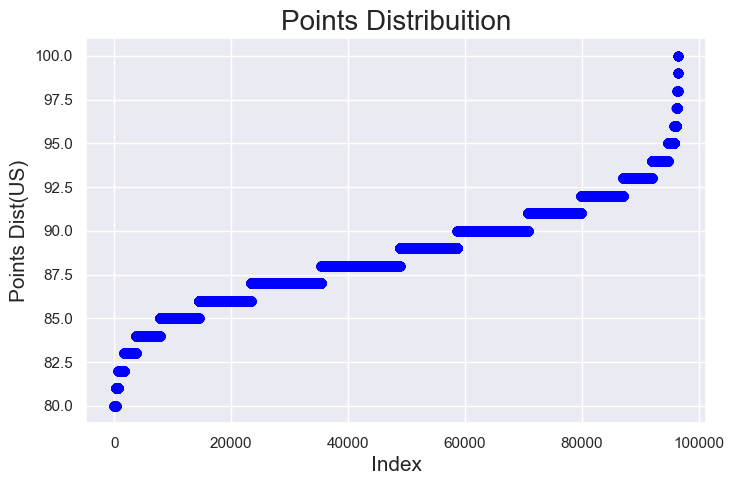

In [40]:
# creating a cumulative distribution
plt.scatter(range(wine.shape[0]),np.sort(wine.points.values), color='blue') 
plt.xlabel('Index', fontsize=15) 
plt.ylabel('Points Dist(US)', fontsize=15)  
plt.title("Points Distribuition", fontsize=20) 
plt.show()

**According to our rankings, how many nations produce wine of the highest quality?**

In [80]:
# distribution of quality of wine from each country
# leading 10 nations by average points

top10 = wine.groupby("country").agg("mean")
top10 = top10.sort_values(by="points", ascending=False)[:10]
top10.style.background_gradient(cmap='flare',high=0.5, subset=["points"])

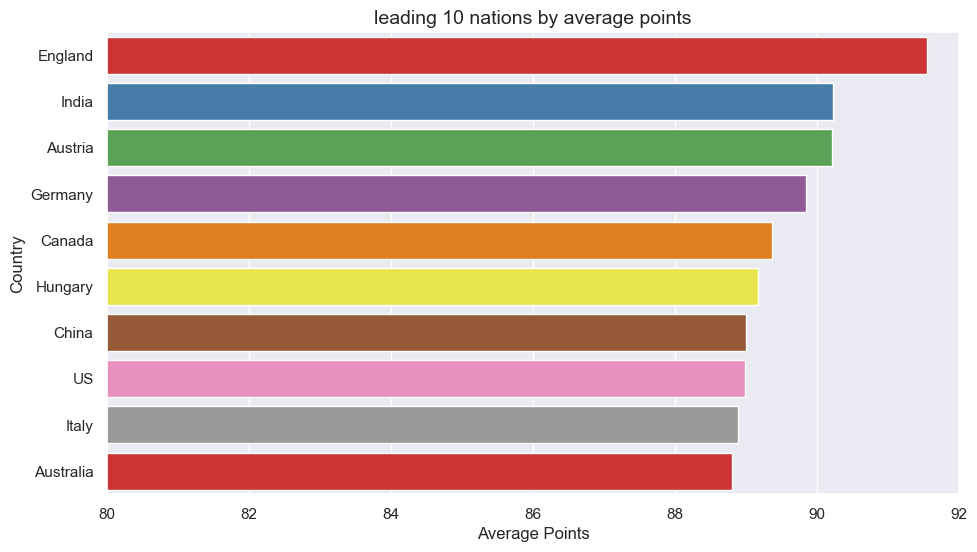

In [87]:
y = top10.index.to_series()
x = top10["points"]

plt.figure(figsize=(11,6))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Set1')
plt.title('leading 10 nations by average points', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

In [43]:
wine["points"].describe()

count    96420.000000
mean        88.585625
std          2.951817
min         80.000000
25%         87.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [44]:
# Let's examine those with scores higher than 95.

score_95 = wine.drop(["description","province", "taster_name"], axis=1)
score_95  = score_95 [score_95 ["points"] >= 95][:20]
score_95.style.background_gradient(cmap='ocean',high=0.5, subset=["points"])

In [45]:
# wines from each nation that received the most 95-100 point ratings

score_95["country"].value_counts()

Australia    6
US           4
France       4
Germany      3
Italy        2
Hungary      1
Name: country, dtype: int64

In [46]:
# count of wines from each country
wine["country"].value_counts()

US                        37511
France                    17525
Italy                     10121
Spain                      6509
Portugal                   4870
Chile                      4305
Argentina                  3753
Austria                    2791
Germany                    2093
Australia                  2007
New Zealand                1270
South Africa               1220
Israel                      484
Greece                      461
Canada                      253
Hungary                     144
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
England                      69
Mexico                       65
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Our plot of the highest scores based on means does not include the nations whose wines had a rating of 95 to 100 points.

We can display the maximum, minimum, and mean scores for each country using a barplot, which should make it clearer which nations receive the highest marks.

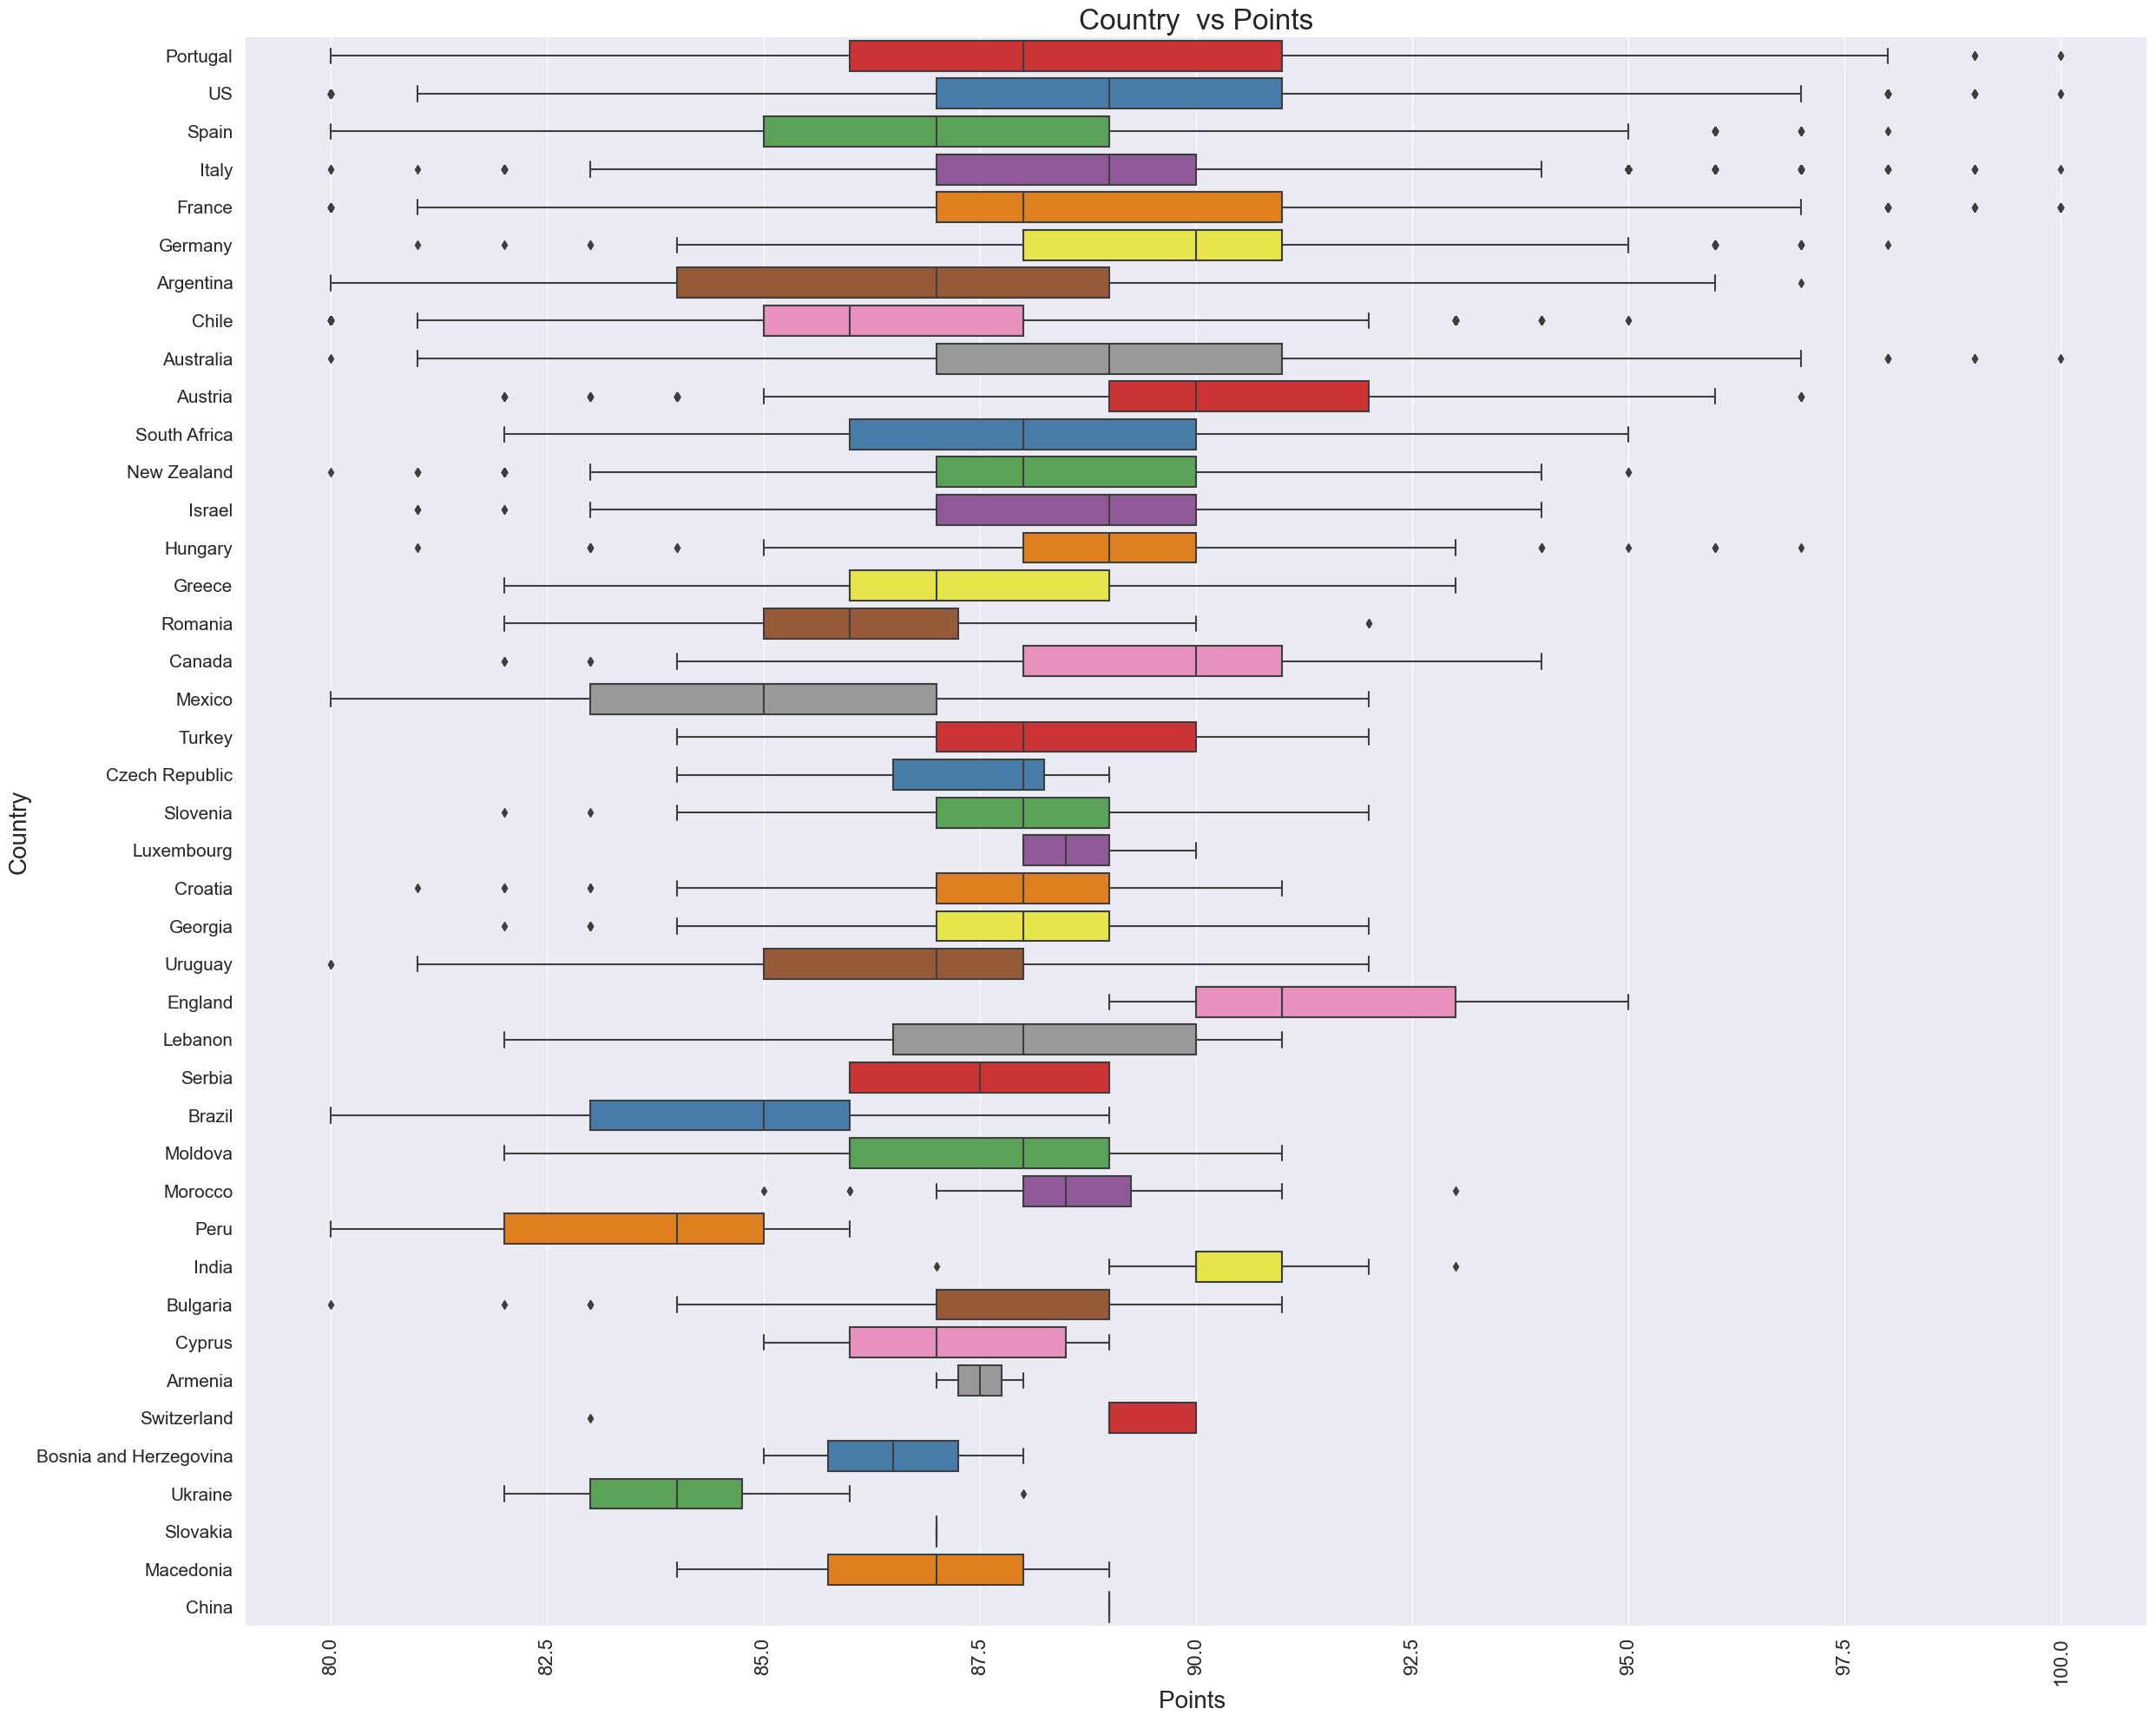

In [47]:
plt.figure(figsize=[25,20])
ax = sns.boxplot(x='points', y='country',data= wine,palette='Set1')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=15)
plt.title('Country  vs Points',fontsize =24)
plt.xlabel('Points ',fontsize = 20)
plt.ylabel('Country',fontsize = 20)
plt.tight_layout()

In [48]:
wine1 = wine[['country','points','price']]
wine1 = wine1.groupby(['country','points'],axis=0).sum().sort_values('price',ascending=False).reset_index().head(10)
wine1

country  points     price
0      US      90  194812.0
1      US      91  188367.0
2      US      88  163026.0
3      US      92  159184.0
4      US      93  125931.0
5      US      87  113009.0
6      US      89  109497.0
7      US      94   83747.0
8      US      86   76999.0
9  France      93   75473.0

In [49]:
wine.groupby("country").price.agg(["sum","mean","min","max","count","median","std","var"])

sum       mean   min     max  count  median  \
country                                                                     
Argentina                 91770.0  24.452438   4.0   230.0   3753    17.0   
Armenia                      29.0  14.500000  14.0    15.0      2    14.5   
Australia                 75247.0  37.492277   5.0   850.0   2007    22.0   
Austria                   85913.0  30.782157   7.0  1100.0   2791    25.0   
Bosnia and Herzegovina       25.0  12.500000  12.0    13.0      2    12.5   
Brazil                     1117.0  23.765957  10.0    60.0     47    20.0   
Bulgaria                   2065.0  14.645390   8.0   100.0    141    13.0   
Canada                     9016.0  35.636364  12.0   120.0    253    30.0   
Chile                     89844.0  20.869686   5.0   400.0   4305    15.0   
China                        18.0  18.000000  18.0    18.0      1    18.0   
Croatia                    1807.0  25.450704  12.0    65.0     71    20.0   
Cyprus                      179.0  16.272727  11.0    21.0     11    16.0   
Czech Republic              291.0  24.250000  15.0    45.0     12    18.0   
England                    3566.0  51.681159  25.0    95.0     69    50.0   
France                   721864.0  41.190528   5.0  3300.0  17525    25.0   
Georgia                    1623.0  19.321429   9.0    40.0     84    17.5   
Germany                   88853.0  42.452461   5.0   775.0   2093    26.0   
Greece                    10310.0  22.364425   8.0    79.0    461    19.0   
Hungary                    5818.0  40.402778  10.0   764.0    144    25.0   
India                       120.0  13.333333  10.0    20.0      9    12.0   
Israel                    15475.0  31.973140   9.0   150.0    484    25.0   
Italy                    421109.0  41.607450   6.0   800.0  10121    30.0   
Lebanon                    1074.0  30.685714  13.0    75.0     35    25.0   
Luxembourg                  140.0  23.333333  16.0    30.0      6    23.0   
Macedonia                   187.0  15.583333  15.0    20.0     12    15.0   
Mexico                     1807.0  27.800000  11.0   108.0     65    23.0   
Moldova                     988.0  16.745763   8.0    42.0     59    13.0   
Morocco                     546.0  19.500000  14.0    40.0     28    18.0   
New Zealand               34617.0  27.257480   7.0   130.0   1270    21.0   
Peru                        289.0  18.062500  10.0    68.0     16    14.5   
Portugal                 127075.0  26.093429   5.0  1000.0   4870    16.0   
Romania                    1829.0  15.241667   4.0   320.0    120     9.0   
Serbia                      294.0  24.500000  15.0    42.0     12    21.0   
Slovakia                     16.0  16.000000  16.0    16.0      1    16.0   
Slovenia                   1985.0  24.812500   7.0    90.0     80    20.0   
South Africa              30506.0  25.004918   5.0   330.0   1220    19.0   
Spain                    184485.0  28.343063   4.0   770.0   6509    18.0   
Switzerland                 597.0  85.285714  21.0   160.0      7    38.0   
Turkey                     2217.0  24.633333  14.0   120.0     90    20.0   
US                      1357465.0  36.188451   4.0  2013.0  37511    30.0   
Ukraine                     129.0   9.214286   6.0    13.0     14     9.0   
Uruguay                    2878.0  26.403670  10.0   130.0    109    20.0   

                              std          var  
country                                         
Argentina               23.331792   544.372537  
Armenia                  0.707107     0.500000  
Australia               51.776061  2680.760534  
Austria                 27.261153   743.170449  
Bosnia and Herzegovina   0.707107     0.500000  
Brazil                  11.053649   122.183164  
Bulgaria                 9.508744    90.416211  
Canada                  19.659456   386.494228  
Chile                   22.074108   487.266239  
China                         NaN          NaN  
Croatia                 12.993173   168.822535  
Cypr

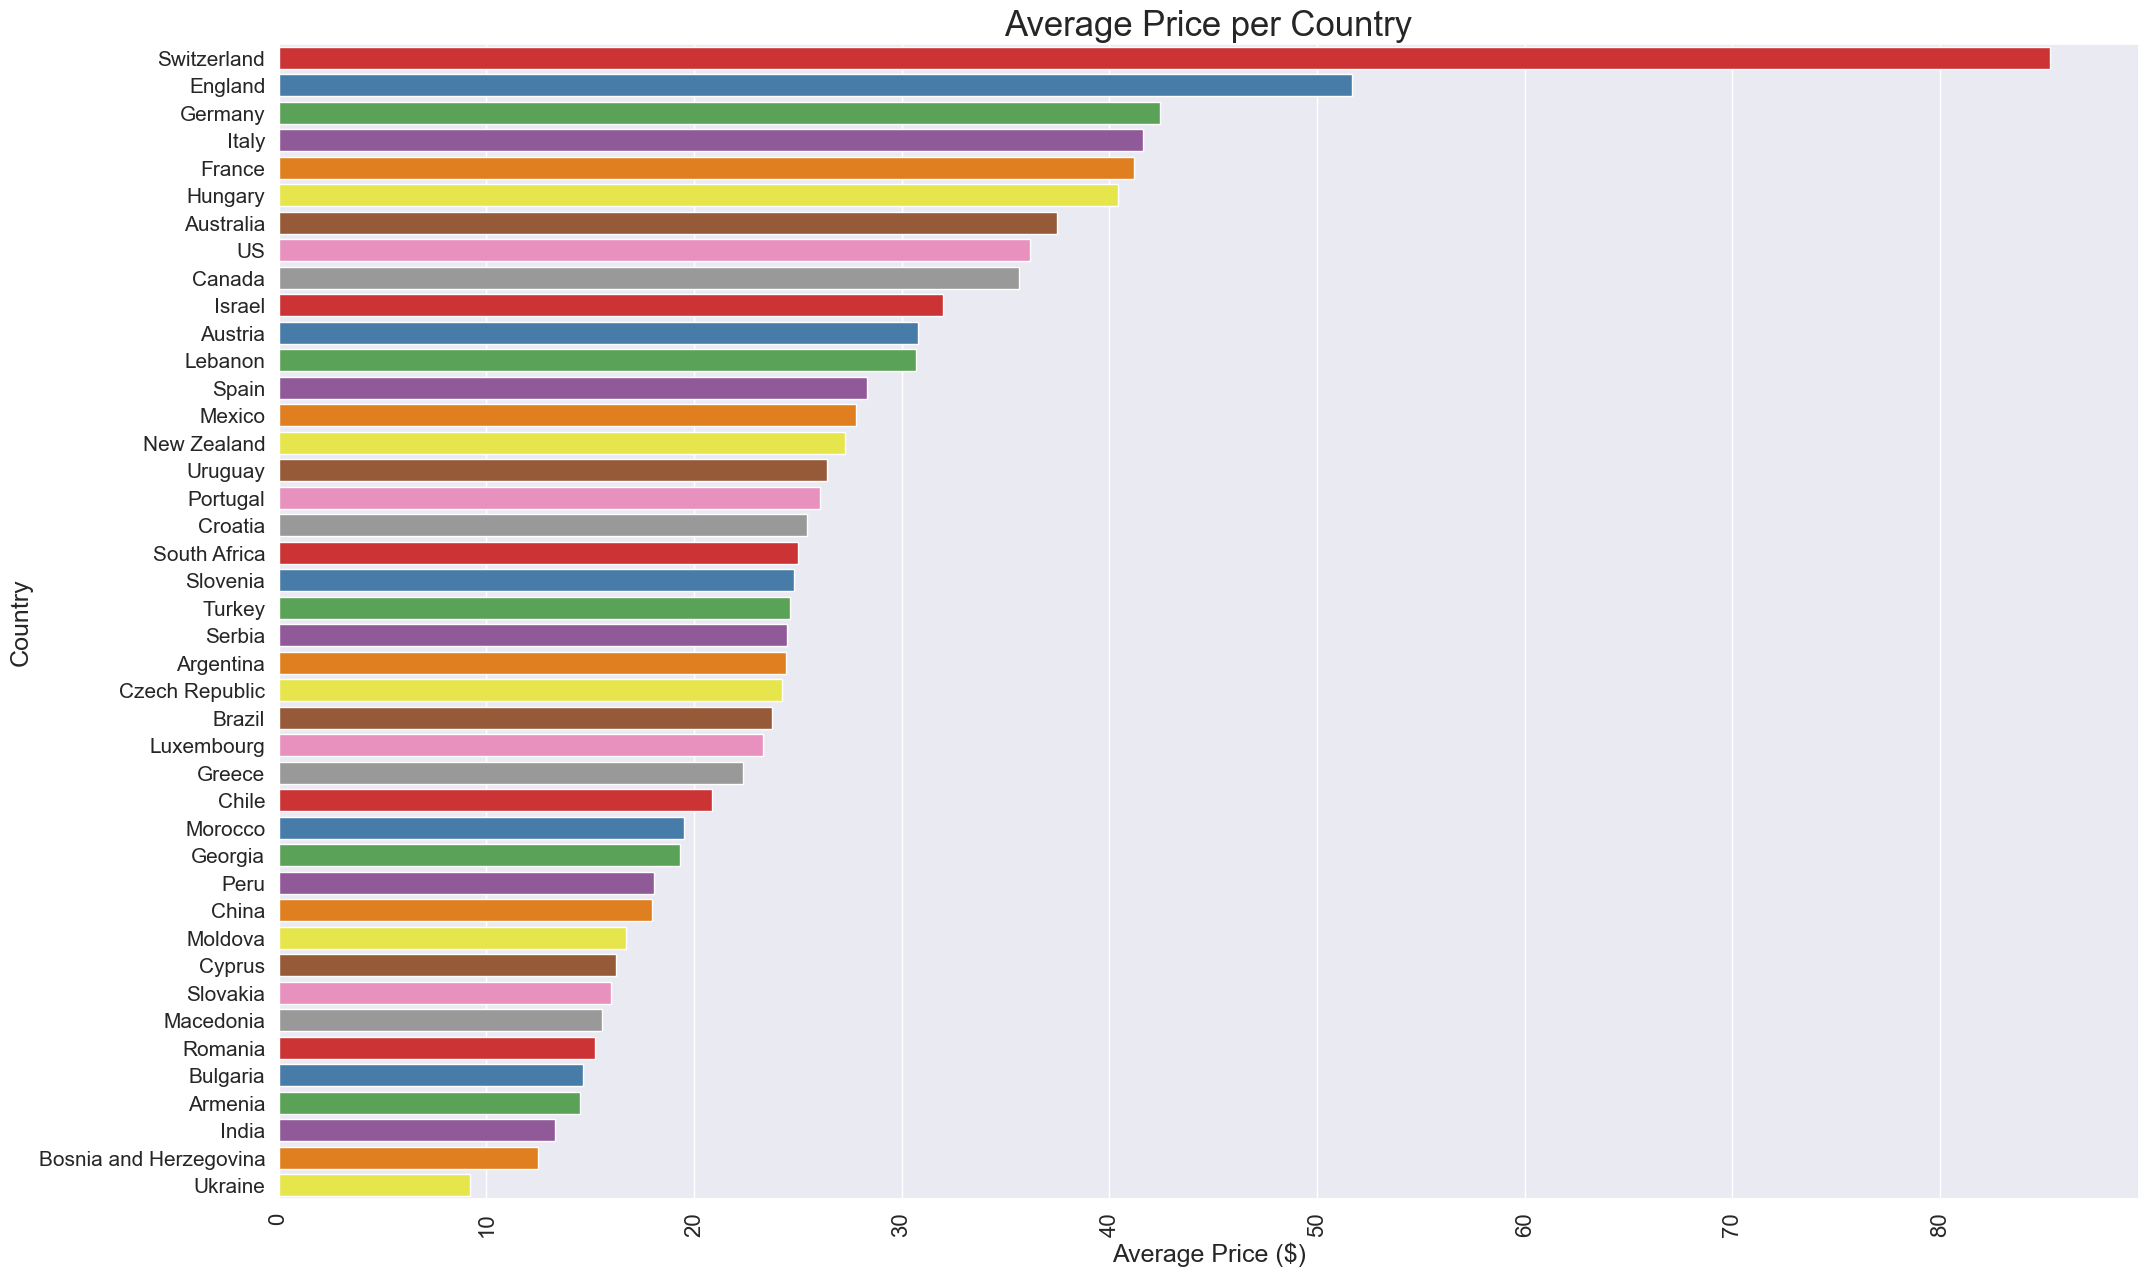

In [50]:
#  average price of wine 

average_price = wine.groupby("country").agg("mean")
average_price = average_price.sort_values(by="price", ascending=False)
y = average_price.index.to_series()
x = average_price["price"]

plt.figure(figsize=[24,15])
ax = sns.barplot(x=x, y=y,data= wine,palette='Set1')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=15)
plt.title('Average Price per Country', fontsize = 25)
plt.xlabel('Average Price ($)',fontsize = 18)
plt.ylabel('Country',fontsize = 18);

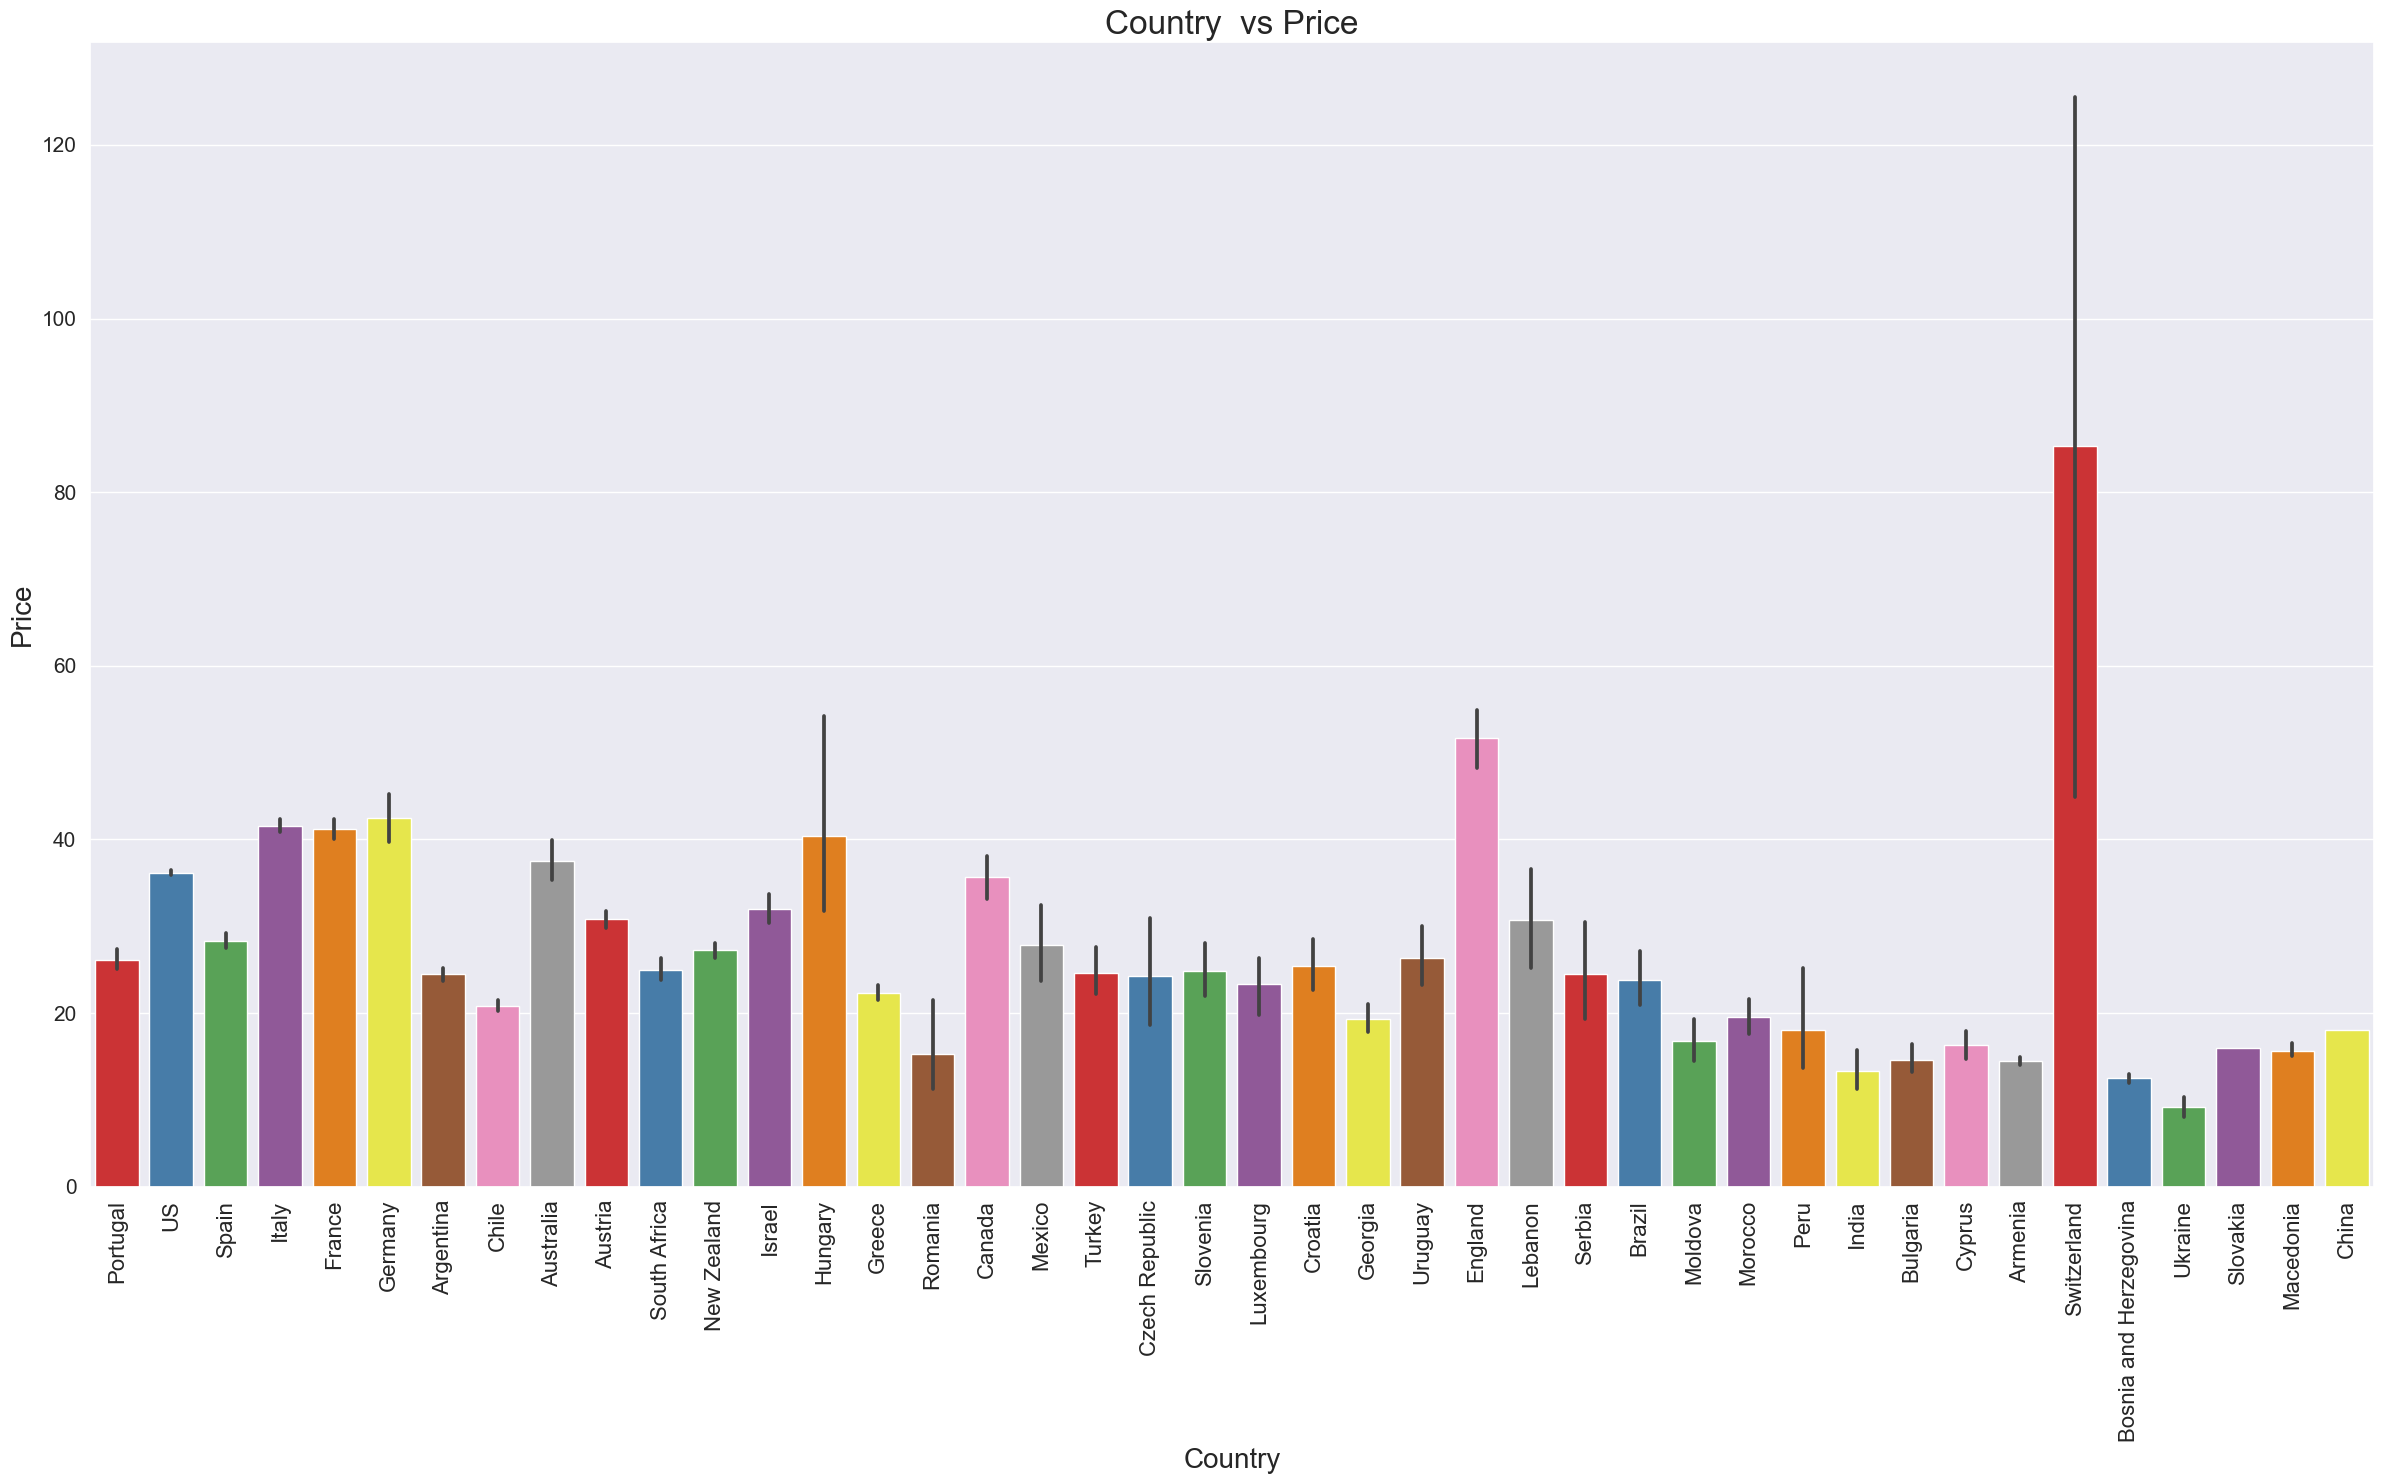

In [51]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x='country', y='price',data= wine,palette='Set1')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=15)
plt.title('Country  vs Price',fontsize =24)
plt.xlabel('Country',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.tight_layout()

The most expensive wine is made in Switzerland, where a bottle costs an average of more than $80. 

Ukraine-produced wine is on the other end of the scale, with an average cost of under $10.

In [52]:
top_price=wine.groupby(['country','variety']).apply(lambda x:x['price'].count()).reset_index(name='Price of Wine')
top_price=top_price[:10]
top_points=wine.groupby(['country','variety']).apply(lambda x:x['points'].count()).reset_index(name='Wine Rating')
top_points=top_points[:10]

best_wines=pd.merge(top_price,top_points,how='inner',left_on=['country','variety'],right_on=['country','variety'])
best_wines_list=best_wines.iloc[:,1:4]
best_wines_list_2=best_wines_list.drop_duplicates()
print('Best Wines:\n',best_wines_list_2)


Best Wines:
                              variety  Price of Wine  Wine Rating
0                            Barbera              1            1
1                            Bonarda            105          105
2           Bordeaux-style Red Blend             86           86
3         Bordeaux-style White Blend              1            1
4                     Cabernet Blend              8            8
5                     Cabernet Franc             64           64
6  Cabernet Franc-Cabernet Sauvignon              3            3
7              Cabernet Franc-Malbec              4            4
8                 Cabernet Sauvignon            536          536
9  Cabernet Sauvignon-Cabernet Franc              1            1


In [53]:
df = wine[['country','price']].copy().dropna()
df['variety'] = df.groupby(['price','country'])['price'].transform('count')
df = df.drop_duplicates().sort_values('price').tail(40)
fig = df.plot(kind='bar',x='country',y='price',color='variety',hover_data=['price'])
fig.update_layout(title="Wine Variety vs Country Vs Price ")
fig.show()

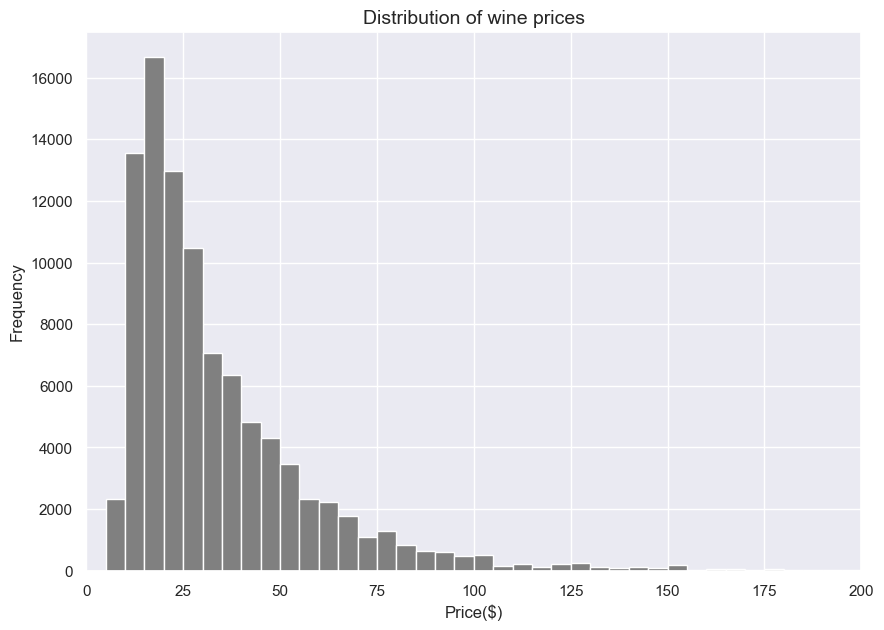

In [54]:
# distribution of wine prices
plt.figure(figsize=(10, 7))
bins = np.arange (0, wine["price"].max()+5, 5)
plt.hist(data=wine, x='price', bins=bins, color = 'grey')
plt.xlim(0,200)
plt.title('Distribution of wine prices', fontsize=14)
plt.xlabel('Price($)')
plt.ylabel('Frequency');

Data on prices is skewed to the right. We need a logarithmic transformation to comprehend the distribution better.

In [55]:
wine["price"].describe()

count    96420.000000
mean        35.005009
std         43.069060
min          4.000000
25%         17.000000
50%         25.000000
75%         40.000000
max       3300.000000
Name: price, dtype: float64

In [56]:
np.log10(wine["price"].describe())

count    4.984167
mean     1.544130
std      1.634165
min      0.602060
25%      1.230449
50%      1.397940
75%      1.602060
max      3.518514
Name: price, dtype: float64

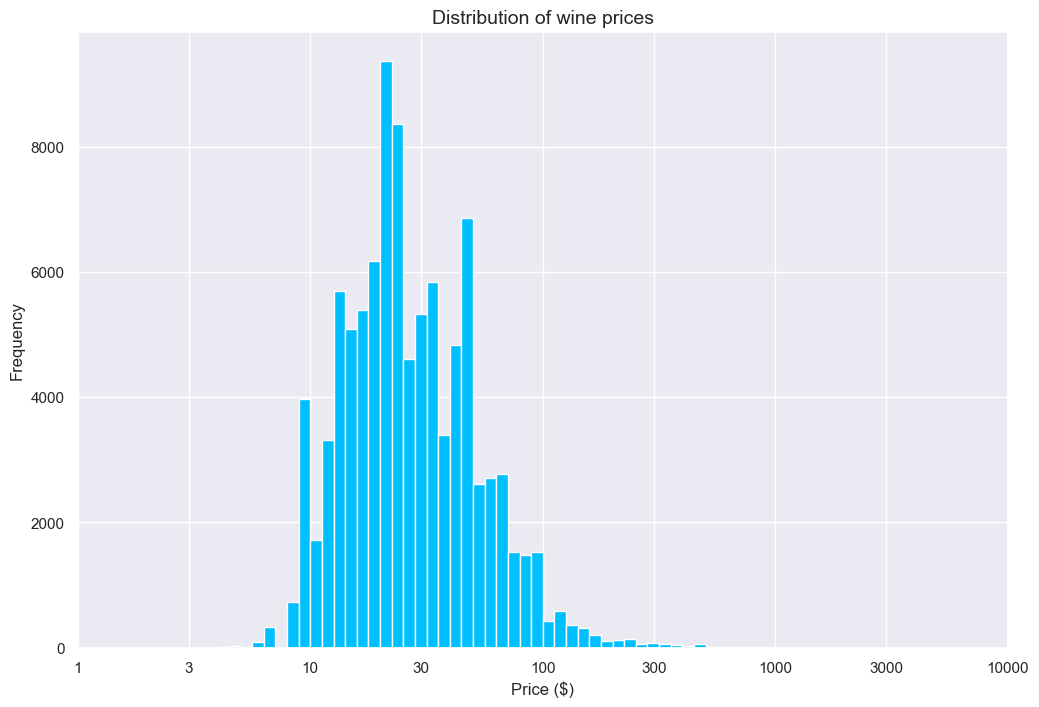

In [57]:
# price distribution on a log scale
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=wine, x='price', bins=bins, color='#00bfff')
plt.title('Distribution of wine prices', fontsize=14)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

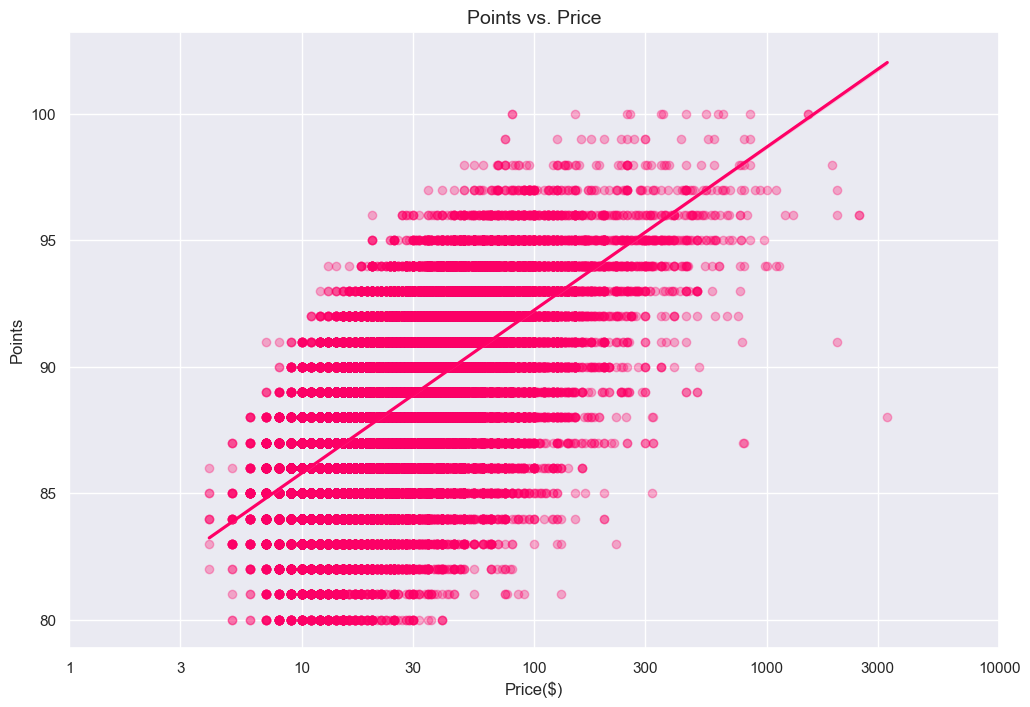

In [58]:
# relationship between points and price
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=wine, color='#FF0066', logx=True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Price", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Price($)")
plt.ylabel("Points");

In [59]:
# Least expensive wine

wine_min = wine.drop(["description","taster_name"], axis=1)
wine_min = wine_min.sort_values(by="price", ascending=True)[:1]
wine_min

country  points  price       province  \
1987   Spain      85    4.0  Central Spain   

                                                  title variety       winery  
1987  Felix Solis 2013 Flirty Bird Syrah (Vino de la...   Syrah  Felix Solis

In [60]:
# Most expensive wine

wine_max = wine.drop(["description","taster_name"], axis=1)
wine_max = wine_max.sort_values(by="price", ascending=False)[:1]
wine_max

country  points   price  province                                 title  \
80290  France      88  3300.0  Bordeaux  Château les Ormes Sorbet 2013  Médoc   

                        variety                    winery  
80290  Bordeaux-style Red Blend  Château les Ormes Sorbet

In [61]:
# Top Wine Varieties

top_varieties = wine['variety'].value_counts()[:20]
top_varieties

Pinot Noir                  9833
Chardonnay                  8292
Red Blend                   6842
Cabernet Sauvignon          6198
Bordeaux-style Red Blend    4816
Riesling                    4722
Sauvignon Blanc             3838
Syrah                       3103
Rosé                        3032
Malbec                      2524
Portuguese Red              2196
Merlot                      2068
Sangiovese                  1824
Nebbiolo                    1755
Tempranillo                 1733
White Blend                 1659
Sparkling Blend             1656
Zinfandel                   1575
Pinot Gris                  1271
Rhône-style Red Blend       1241
Name: variety, dtype: int64

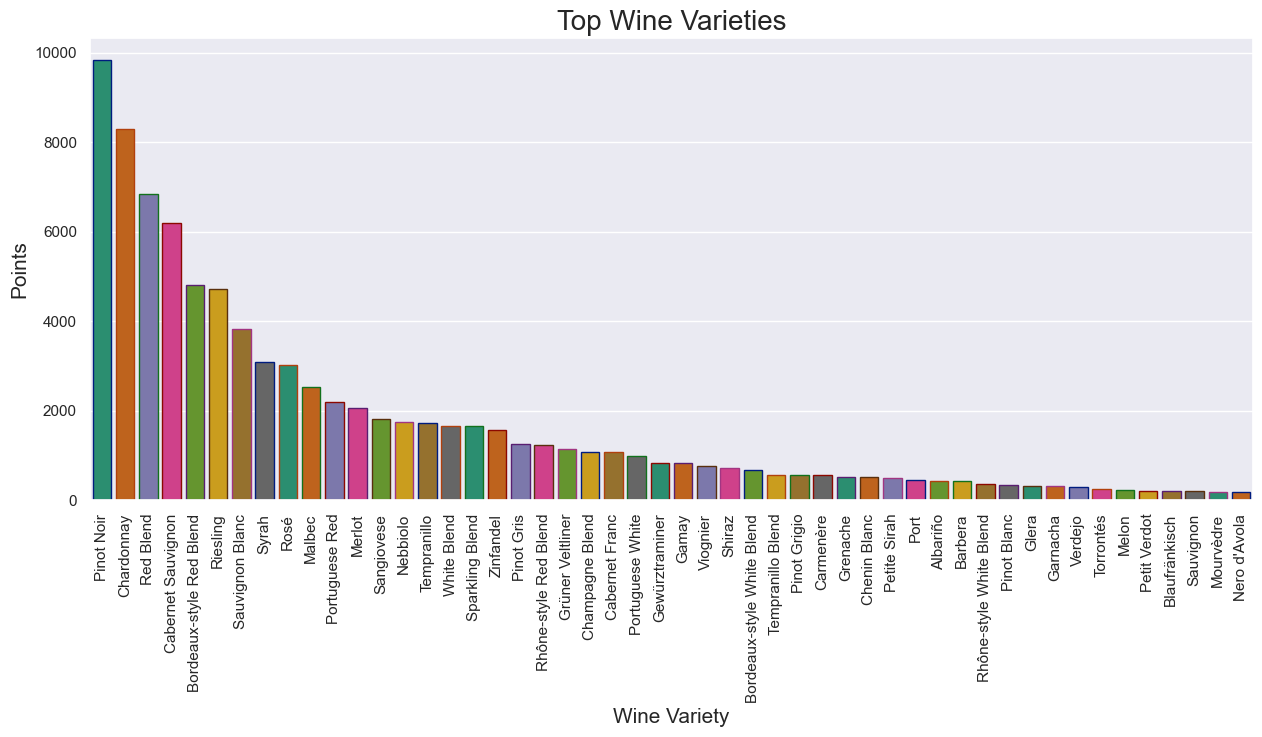

In [62]:
plt.subplots(figsize=(15,6))
sns.countplot(x =wine['variety'],palette='Dark2',edgecolor=sns.color_palette('dark',7),order=(wine['variety'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.title('Top Wine Varieties', fontsize = 20)
plt.xlabel('Wine Variety', fontsize = 15)
plt.ylabel('Points',fontsize = 15);
plt.show()

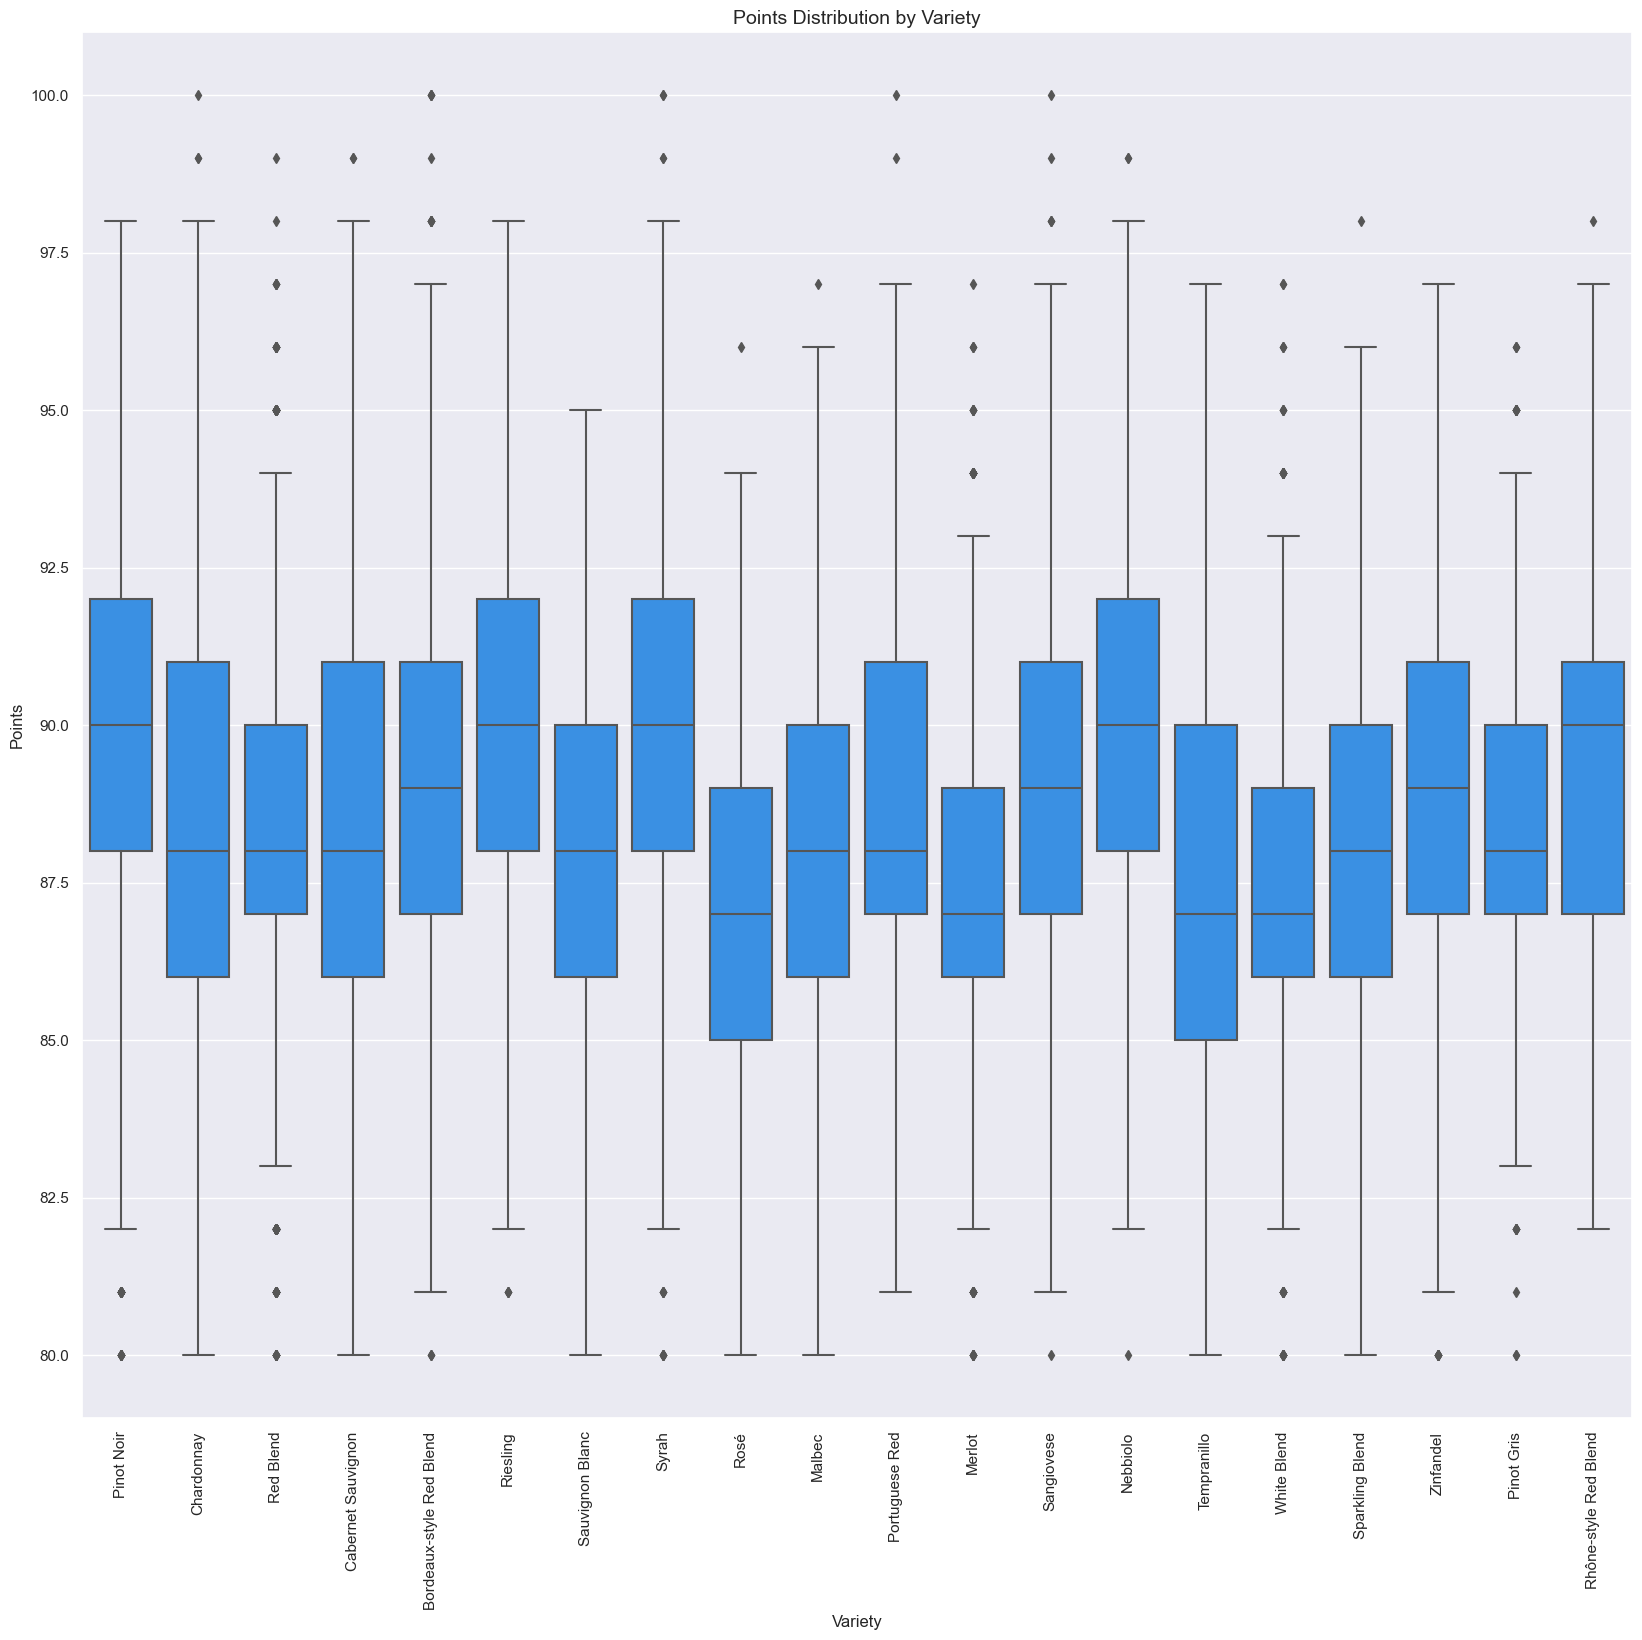

In [63]:
# top 20 most frequent wines by points scored
plt.figure(figsize=(20, 18))
sns.boxplot(data=wine,
            x='variety',
            y='points',
            color="#1e90ff",
            order=wine["variety"].value_counts().iloc[:20].index)

plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

In [64]:
# best ten below $15

wine_15 = wine.drop(["description", "province", "taster_name"], axis=1)
wine_15 = wine_15[wine_15["price"] <= 15]
wine_15 = wine_15.sort_values(by="points", ascending=False)[:10]
wine_15.style.background_gradient(cmap='gray',high=0.5, subset=["price"])

In [65]:
# best ten between $15 and $30

wine_15_30 = wine.drop(["description", "province", "taster_name"], axis=1)
wine_15_30 = wine_15_30.query("price > 15 and price <= 30")
wine_15_30 = wine_15_30.sort_values(by="points", ascending=False)[:10]
wine_15_30.style.background_gradient(cmap='twilight_r',high=0.5, subset=["price"])

In [66]:
# best ten between $30 and $50

wine_30_50 = wine.drop(["description", "province", "taster_name"], axis=1)
wine_30_50 = wine_30_50.query("price > 30 and price <= 50")
wine_30_50 = wine_30_50.sort_values(by="points", ascending=False)[:10]
wine_30_50.style.background_gradient(cmap='twilight_r',high=0.5, subset=["price"])

In [67]:
# best ten above $50

wine_50 = wine.drop(["description", "province", "taster_name"], axis=1)
wine_50 = wine_50.query("price > 50")
wine_50 = wine_50.sort_values(by="points", ascending=False)[:10]
wine_50.style.background_gradient(cmap='twilight_r',high=0.5, subset=["price"])

**Wines from the US, France, Italy, Spain, and Portugal make up the majority of the reviews.**

In [68]:
# find correlation coefficient of all variables

wine.corr()

points     price
points  1.000000  0.404002
price   0.404002  1.000000

In [69]:
corr=wine[['points','price']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

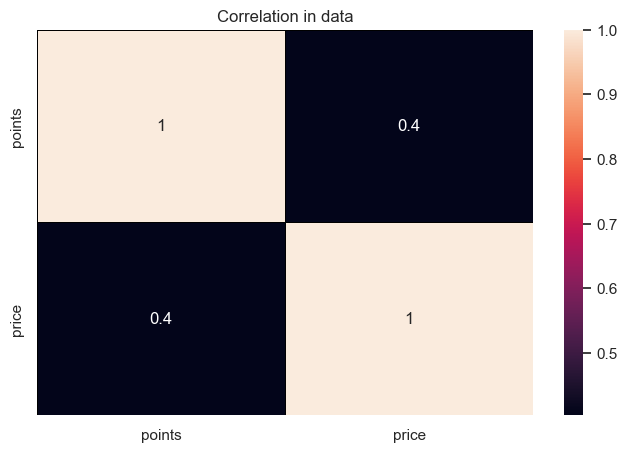

In [70]:
plt.figure(figsize=(8,5))
sns.heatmap(wine.corr(),annot=True,linewidth=0.5,linecolor="black")
plt.title('Correlation in data')
plt.show()

In [71]:
# check the number of reviews per country
wine["country"].value_counts()

US                        37511
France                    17525
Italy                     10121
Spain                      6509
Portugal                   4870
Chile                      4305
Argentina                  3753
Austria                    2791
Germany                    2093
Australia                  2007
New Zealand                1270
South Africa               1220
Israel                      484
Greece                      461
Canada                      253
Hungary                     144
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
England                      69
Mexico                       65
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [72]:
!pip install wordcloud

In [73]:
# WordCloud of reviews

import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = wine["description"][1]
text = " ".join(i for i in wine["description"])
len(text)

23882089

In [74]:
# create stopword list
stopwords = set(STOPWORDS)
stopwords.update(['fruit', "Drink", "black", 'wine', 'drink'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=2048,height=1024, max_words=1000).generate(text)

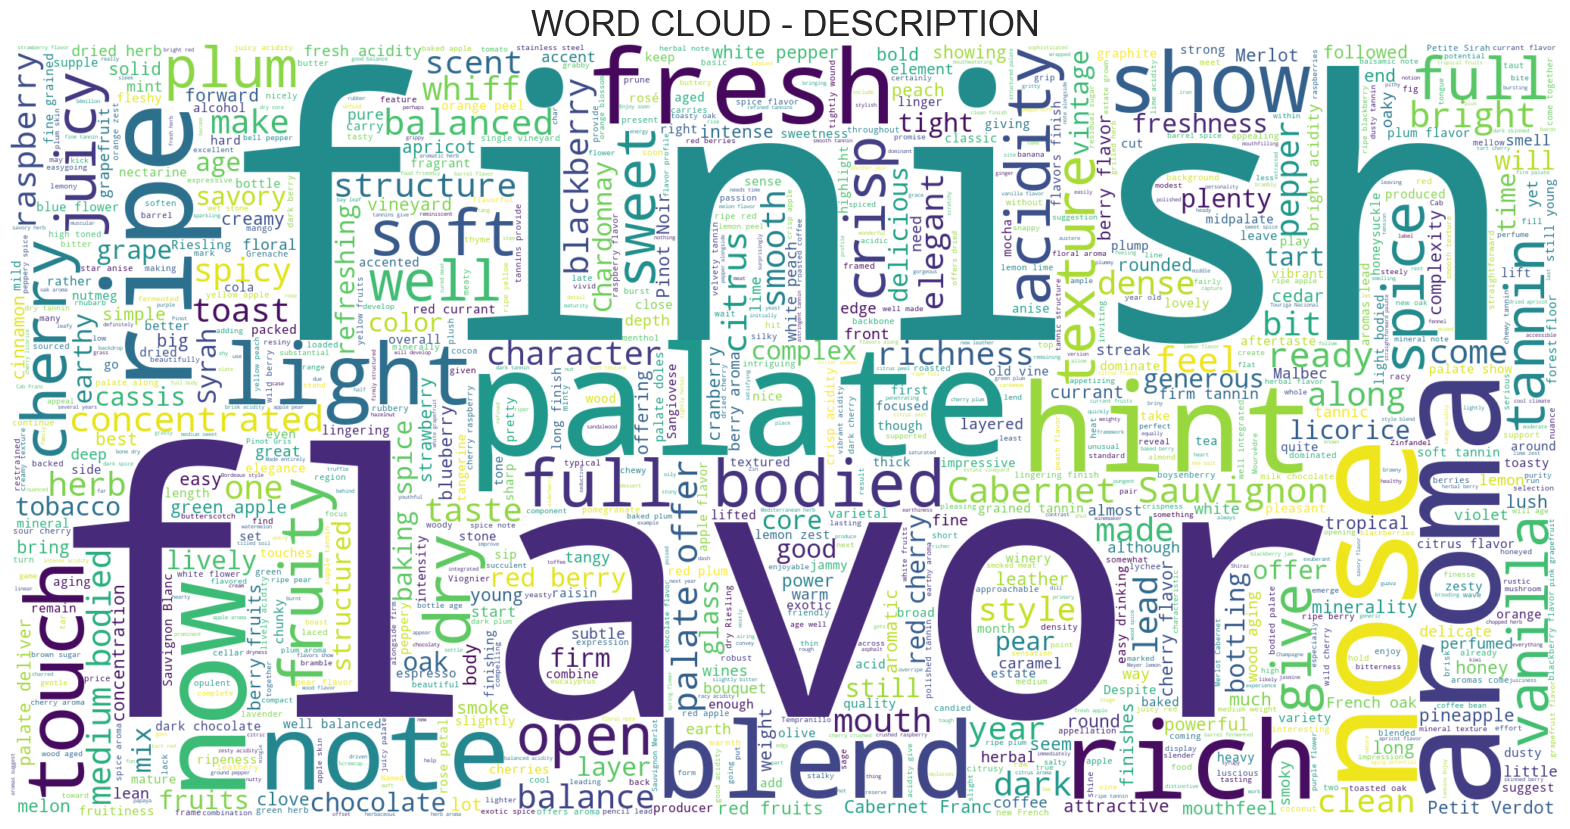

In [75]:
# display the generated image
plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis("off");

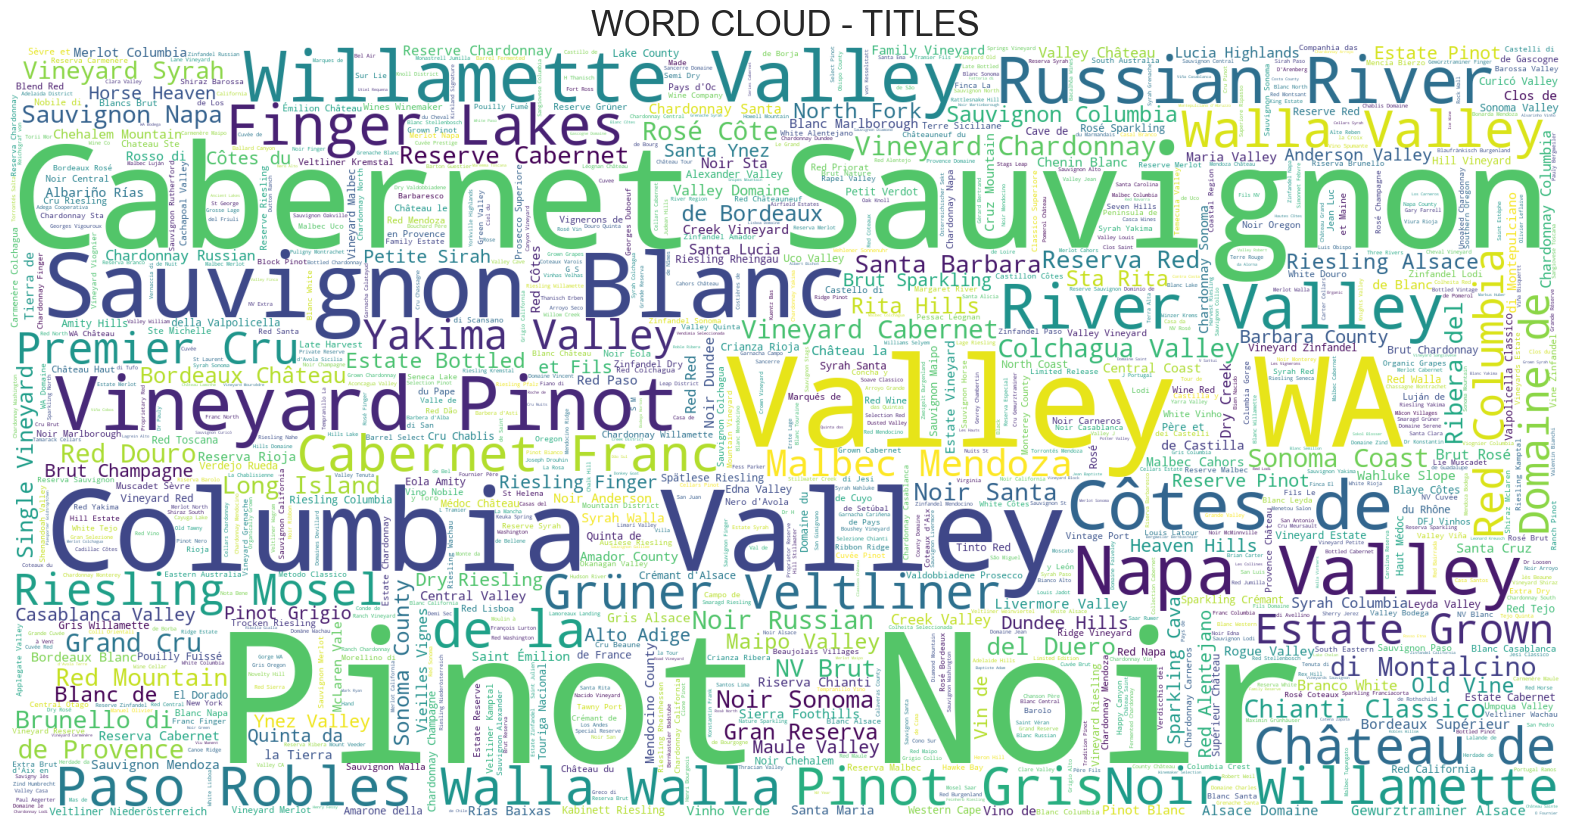

In [76]:
text = wine["title"][1]
text = " ".join(i for i in wine["title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=2048,height=1024, max_words=1000).generate(text)
plt.figure(figsize=(20,18))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

**Conclusion:**

* On the whole, England produces excellent wine. But if you want a bottle with a perfect score of 100, you should seek to the usual suspects: France, Italy, Portugal, the US, or Australia.

* Price and quality are connected. But if you know where to search, you can get a $4 bottle of wine that is only 3 points worse to a $3300 bottle.



    